<a href="https://colab.research.google.com/github/ryanmcmanamon1/computational_physics/blob/main/Copy_of_Ryan_McManamon_PHYS250_midterm_project_2025_ipynb_on_2025_04_01_21_08_35.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Physics: Midterm Project 2025



### Overview

The goal of this project is to model a ski jumper on the Lake Placid H120 ski jump.

We will break the problem into two parts.

* **Part 1**: skier slides down incline.  
  * We will consider the following forces: gravity, friction, and air resistance (drag).
  * Our goal here is to determine the skier's position, velocity, and acceleration as they travel to the bottom of the incline.
  * We will use the skier's final speed at the bottom of the incline as the input speed to part 2.

* **Part 2**: skier flies through the air and lands somewhere down the slope.
  * We will consider the following forces: gravity, friction, air resistance (drag), and lift.
  * Our goal here is to determine the skier's velocity at the bottom of the incline.

### Parameters

| Param | value | Part |
|---|---|--|
|Inrun length |98 m | 1|
|Incline of slope | 30$^\circ$ |1, 2|
|$\mu_k$ |0.05| 1|
|launch angle at end of incline |-11$^\circ$ | 2 |
|skier's jump speed perpendicular to slope | 2.0 m/s | 2 |




In [ ]:
# import numpy as pyplot
import numpy as np
import matplotlib.pyplot as plt

# Part 1: Skier Sliding Down incline

## 1.0 - Introduction

* In Part 1, we will model the motion of the skier as they descend the incline and gain speed.
* We adopt a coordinate axis such that the x axis is along incline and the y axis is perpendicular to the incline.


$$ \sum F = m a_x $$
$$ \vec{F}_n + \vec{F}_g + \vec{F}_f + \vec{F}_{drag} = m a_x$$

* The acceleration is the y direction is zero:
$$m a_y = F_n - mg cos\theta = 0$$
and this yields an equation for the normal force:
$$F_n = mg cos\theta$$

* The acceleration in the x direction is not zero.
$$ma_x = mg sin\theta - \mu_k mg cos\theta - B_2 v v_x$$
and the resulting equation for the acceleration is:
$$a_x = g sin\theta - \mu_k g cos\theta - \frac{B_2}{m} v v_x$$






## 1.1 - Function to Calculate B2

(5 points)

Write a function called `get_B2` to calculate B2.


### Input Parameters
* A : cross-sectional area, in meters

### Optional Input Parameters
* C : drag coeffiecient, default value is 0.7
* rho_air : density of air in kg/m^3, default value is 1.225

### Return
* B2 : drag parameter

In [ ]:
# your function get_B2 here
def get_B2(A,C=0.7,rho_air=1.225):
  '''
  inputs: cross sectional area, drag coeeficient, density of air

  function calculates constant B2 to account for air resistance

  outputs: B2
  '''
  B2 = (1/2)*C*rho_air*A
  return B2


## 1.2 - Function to Calculate the Acceleration Down the Incline

(5 points)

Write a function to calculate the x acceleration for Part 1.

#### Input Parameters
* vx : speed of the skier, in units of m/s
* B2 : drag parameter
* m : mass of skier, in units of kg
* theta : angle of the incline, in units of radians

#### Optional Input Parameters
* mu_k : coeffiecient of kinetic friction, default value is 0.07


#### Return
* ax : the acceleration in the x direction

In [ ]:
# your function to calculate acceleration down the incline
def calculate_acceleration_down(vx,B2,m,theta_rad,mu_k=0.07):
  '''
  inputs: initla x velocity, B2, mass, theta, coeeficient of friction

  function calculates the acceleration of the skier due acoundting for air restsance
  and friction

  outputs: acceleration
  '''
  g = 9.81
  ax = g*np.sin(theta_rad) - mu_k*g*np.cos(theta_rad) - (B2/m)*vx*np.abs(vx)
  return ax

## 1.3 - Write Your Calculate Function

(5 points)

* This function will use the Euler method to calculate the position, velocity, acceleration, and time as the skier moves down the incline.  
* The calculations will continue until the skier reaches the end of the incline. (*Hint:* a `while` loop is good for this!)

#### Inputs Parameters
* x0 : initial x position
* v0 : initial x velocity
* A : cross-sectional area of skier
* theta_rad : angle of the hill incline, in units of radians

#### Optional Input Parameters
* inrun_length : length of the slope in the x direction in meters, default value is 98


#### Return
* tarr1 : array containing the time in seconds
* xarr1 : array containing the x position in meters
* vxarr1 : array containing the x velocity in m/s
* axarr1 : array containing the x acceleration in m/s^2

In [ ]:
# your calculate function here
def calculate_down(x0,v0,A,theta_rad,inrun_length=98):
  '''
  inputs: intial x position, initial velcoity, cross sectional area
  theta, inrun length

  function calculates time for skier to reach the jump, its position,
  veolcity, and acceleration

  output: t, x, vx, ax
  '''
  t = [0]
  x = [x0]
  vx = [v0]
  ax = [calculate_acceleration_down(v0,B2,m,theta_rad,mu_k=0.07)]
  i = 0
  while x[i-1]<=inrun_length:
    t.append(t[i-1]+dt)
    x.append(x[i-1] + vx[i-1]*dt)
    ax.append(calculate_acceleration_down(vx[i-1],B2,m,theta_rad,mu_k=0.07))
    vx.append(vx[i-1] + calculate_acceleration_down(vx[i-1],B2,m,theta_rad,mu_k=0.07)*dt)
  return t,x,vx,ax

## 1.4 - Function to Plot Results

(5 points)

* Make a function to create a figure with 3 rows and 1 column to plot the position, velocity, and acceleration of skier versus time, as they travel down the incline.

#### Input Parameters
  * tarr1
  * xarr1
  * vxarr1
  * axarr1

#### Return

Nothing.

In [ ]:
# your plot function here
def plot_down(t,x,vx,ax):
  '''
  inputs: time array, position array, x velo array,
  x accel array

  function plots position, velocity, and acceleration vs. time

  outputs: no output
  '''
  plt.figure()
  plt.plot(t,x)
  plt.title('Position vs. Time')
  plt.xlabel('time(s)')
  plt.ylabel('position(x)')
  plt.figure()
  plt.plot(t,vx)
  plt.title('Velocity vs. Time')
  plt.xlabel('time(s)')
  plt.ylabel('x velocity(m/s)')
  plt.figure()
  plt.plot(t,ax)
  plt.title('Acceleration vs. Time')
  plt.xlabel('time(s)')
  plt.ylabel('x acceleration(m/s^2)')

## 1.5 - Putting It All Together

(5 points)

In the cell below, write the code needed to run your functions and model the motion of the skier down the inrun slope.

### Questions:



1. What is the skier's final velocity in units of m/s and mph?

**your answer here**
The final velocity of the skier is 24.84m/s or 55.58mph.

2. Does the skier reach terminal velocity?  Justify your answer.
**your answer here**
No, the skier does not reach terminal velocity. This is because of air resistance and the cross sectional area of the skier limit the maximum velocity the skier can reach.

The final velociy of the skier is 24.84m/s or 55.58mph
The skier does not reach terminal velocity due to drag and friction


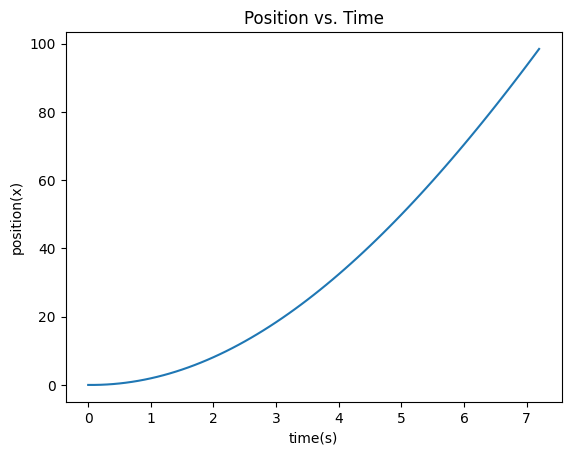

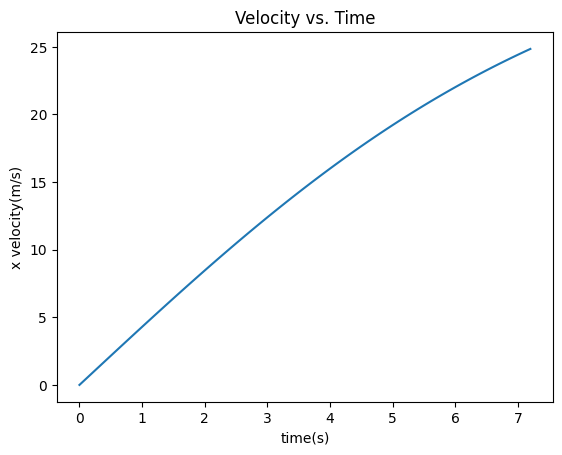

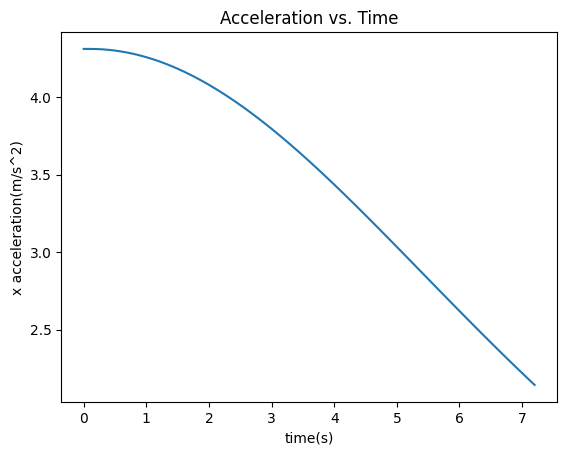

In [ ]:
# ASSUMPTIONS
height = 1 # meter, in crouched position
width = 0.5 # meter

# cross-sectional area
A = height * width

m = 60 # mass in kg

# your additional code below
theta_rad = np.radians(30)
vx = 0
x0 = 0
v0 = 0
dt = 0.1

B2 = get_B2(A,C=0.7,rho_air=1.225)
ax = calculate_acceleration_down(vx,B2,m,theta_rad,mu_k=0.07)
t,x,vx,ax = calculate_down(x0,v0,A,theta_rad,inrun_length=98)
plot_down(t,x,vx,ax)

print(f'The final velociy of the skier is {vx[-1]:.2f}m/s or {vx[-1]*2.237:.2f}mph')
print('The skier does not reach terminal velocity due to drag and friction')

# Part 2: The Jump

The second part of our analysis starts with the skier jumping off the inrun and ends when they land on the slope.  


## 2.0 : Modeling the Slope of the Hill & When to Stop

* The skier is jumping along the hill, and the y height of the hill decreases as the x position of the skier increases.
* We will stop the Euler calculation when the skier's y position is equal to the hill's y height.  You will compare the skier's $y$ position at every step with the height of the hill at that value of $x$, and stop when $y < = y_{hill}$.

* To accomplish this, we will need a function that returns the height of the hill for each value of $x$.




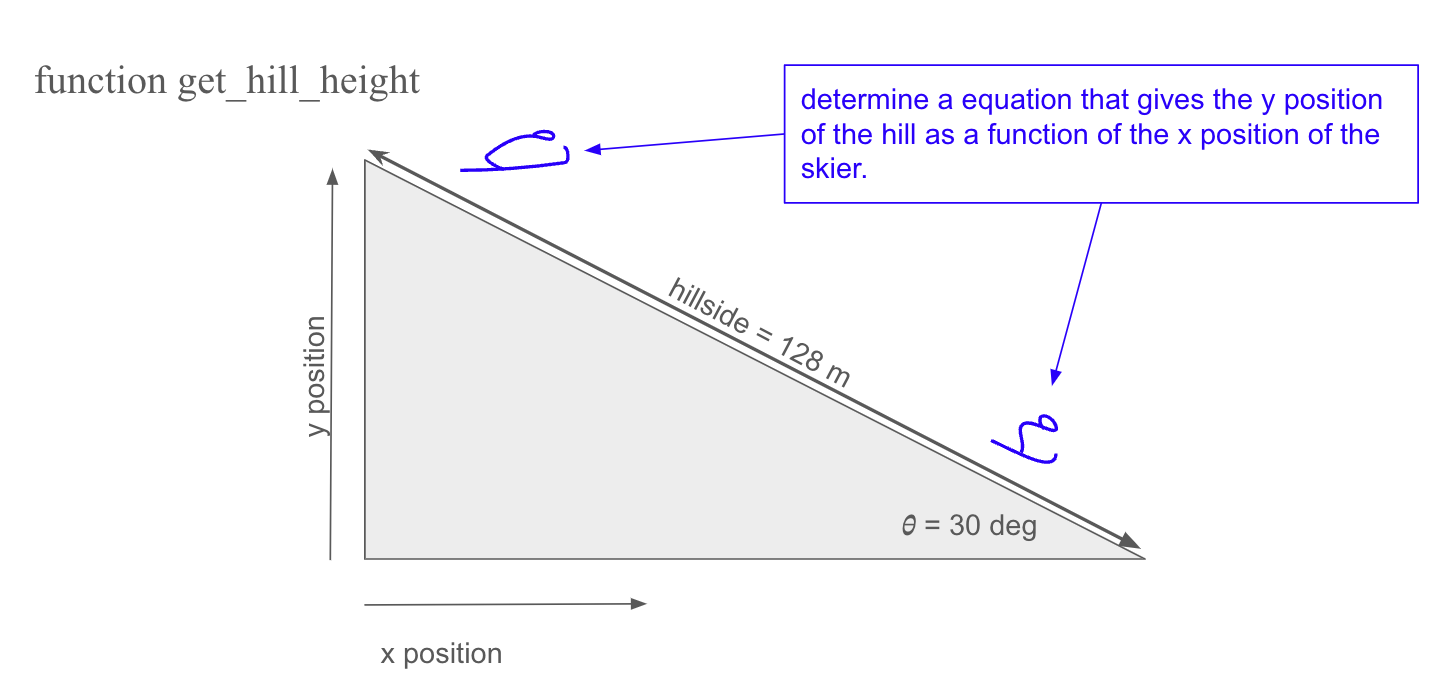

## 2.1 - Function to get hill height

(5 points)

Write a function  that returns the height of the hill as a function of horizontal distance from the start of the jump.

#### Input Parameters
* x position

#### Return
* height of the hill

In [ ]:
# your get_hill_height function here
def get_hill_height(x):
  '''
  inputs: x

  function calulated the height of the hill ar any given x position

  outputs: hill height
  '''
  rad = np.radians(30)
  h = (128*np.cos(rad)-x)*np.tan(rad)
  return h

## 2.2 - Testing your hill height function

(5 points)

* create an array of x values

* use your `get_hill_height` function to get the height of the hill at each position.

* create a plot of hill height vs. x position, and make sure this looks correct.

Text(0, 0.5, 'hill height')

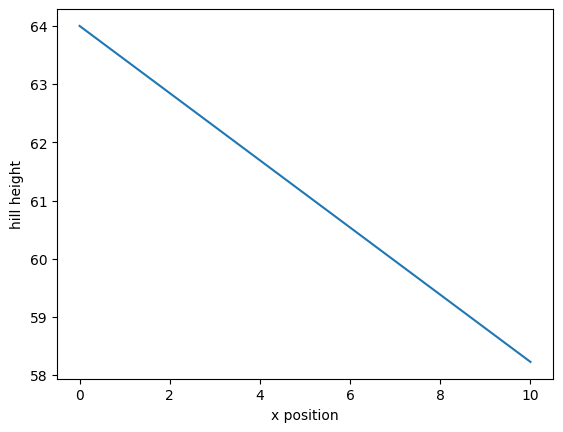

In [ ]:
# your code to test get_hill_height here
xpos = np.linspace(0,10)
h = get_hill_height(xpos)
plt.figure()
plt.plot(xpos,h)
plt.xlabel('x position')
plt.ylabel('hill height')


## 2.3 - Force analysis

**NOTE: Please refer to the videos that I put on canvas for more details on how to analyze the forces and derive the acceleration.**

* We align the x axis horizontally and the y axis vertically.
* We follow Elmark+2022 figure to express the drag and lift force in terms of the angle $\phi$ between the horizontal and the skier's direction of motion.  
  * Note that $\phi$ is not a constant but instead changes throughout the skier's flight.  
  * The drag force is directed in the opposite direction of motion, and the lift force is perpendicular to the direction of motion.

* Force Analysis:


$$ \sum \vec{F} = m \vec{a} $$

$$ \vec{F}_{lift} + \vec{F}_g  + \vec{F}_{drag} =  m \vec{a}$$

* We can then analyze the x and y components separately.
$$m a_y = F_L cos(\phi) - F_D sin(\phi) - F_g $$

$$m a_x = -F_L sin(\phi) - F_D cos(\phi)$$

### Describing the Drag and Lift Forces

The magnitude of the drag force is:
$$ \rm F_D = \frac{1}{2} C_D \rho_{air} A v^2  $$
and the direction is opposite the direction of motion.


Similarly, the magnitude of the lift force is:
$$ \rm F_L = \frac{1}{2} C_L \rho_{air} A v^2 $$
and the direction is opposite the direction of motion.


In terms of components:

$$ \rm F_{Dx} = - \frac{1}{2} C_D \rho_{air}~ A ~v^2 ~cos(\phi) = - \frac{1}{2} C_D \rho_{air}~ A ~v ~v_x  $$
and
$$ \rm F_{Dy} = - \frac{1}{2} C_D \rho_{air}~ A ~v^2 ~ sin(\phi) = - \frac{1}{2} C_D \rho_{air}~ A ~v~v_y  $$

Similarly, the components of the lift force are:


$$ \rm F_{Lx} = - \frac{1}{2} C_L \rho_{air}~ A ~v^2 ~sin(\phi) = - \frac{1}{2} C_L \rho_{air}~ A ~v ~ v_y  $$
and
$$ \rm F_{Ly} = + \frac{1}{2} C_L \rho_{air}~ A ~v^2 ~cos(\phi) = + \frac{1}{2} C_L \rho_{air}~ A ~v ~v_x  $$

### Net Accelerations

* The resulting accelerations in the horizontal and vertical directions are:

$$a_x =  -\frac{B_L}{m} v~v_y - \frac{B_D}{m} v~v_x$$

$$a_y = \frac{B_L}{m} v~v_x - \frac{B_D}{m} v~v_y - g $$


## 2.4 - Acceleration Functions

(10 points)

Write your acceleration functions: `get_ax_part2` and `get_ay_part2` to calculate the acceleration of the skier during the jump phase.

### Acceleration Functions

Each acceleration function should have:

#### Input Parameters:

* vx - velocity in the horizontal direction
* vy - velocity in the vertical direction
* BL - coefficient of lift
* BD - coefficient of drag
* m - mass

#### Return
* acceleration


In [ ]:
# your get_ax_part2 function
def get_ax_part2(vx2,vy2,BL,BD,m):
  '''
  inputs: x velo, y velo, BL, BD, mass

  function calculated acceleration in the x dicrection accounting for
  lift and air reisistance

  outputs: x accel
  '''
  v = np.sqrt(vx2**2+vy2**2)
  ax = (-BL/m)*v*vx2 - (BD/m)*v*vy2
  return ax


# your get_ay_part2 function
def get_ay_part2(vx2,vy2,BL,BD,m):
  '''
  inputs: x velo, y velo, BL, BD, mass

  function calculated acceleration in the y dicrection accounting for
  lift and air reisistance

  outputs: y accel
  '''
  g = 9.81
  v = np.sqrt(vx2**2+vy2**2)
  ay = -g - (BD/m)*v*vy2 + (BL/m)*v*vx2
  return ay




## 2.4 - Calculate Function

(5 points)

Write you function to calculate the Euler Method.

#### Input Parameters

Determine what you need

#### Description
* This function will initialize lists for:  
  * tarr2
  * xarr2, yarr2
  * vxarr2, vyarr2
  * axarr2, ayarr2

* Use a `while` loop to continue the Euler calculation until the skier's y height is equal to (or less than) the height of the hill.  This is the point where the skier lands.

#### Return
  * tarr2
  * xarr2, yarr2
  * vxarr2, vyarr2
  * axarr2, ayarr2




In [ ]:
# your calculate function here
def calculate2(x20,y20,vx20,vy20,BL,BD,m,dt):
  '''
  inputs: initial x position, initial y position, initial x velo,
  initial y velo, BL, BD, mass, time step

  function calculated total time for skier to land, x position, y position,
  x velo, y velo, x accel, and y accel

  output: t2 ,x2, y2, vx2, vy2, ax2, ay2
  '''
  t2 = [0]
  x2 = [x20]
  y2 = [y20]
  vx2 = [vx20]
  vy2 = [vy20]
  ax2 = [get_ax_part2(vx20,vy20,BL,BD,m)]
  ay2 = [get_ay_part2(vx20,vy20,BL,BD,m)]
  i=1
  while y2[i-1]>=get_hill_height(x2[i-1]):
    t2.append(t2[i-1] + dt)
    x2.append(x2[i-1] + vx2[i-1]*dt)
    y2.append(y2[i-1] + vy2[i-1]*dt)
    ax2.append(get_ax_part2(vx2[i-1],vy2[i-1],BL,BD,m))
    ay2.append(get_ay_part2(vx2[i-1],vy2[i-1],BL,BD,m))
    vx2.append(vx2[i-1] + get_ax_part2(vx2[i-1],vy2[i-1],BL,BD,m)*dt)
    vy2.append(vy2[i-1] + get_ay_part2(vx2[i-1],vy2[i-1],BL,BD,m)*dt)
    i=i+1
  return t2,x2,y2,vx2,vy2,ax2,ay2




## 2.6 - Functions to Make Plots

### 2.6.1 - make_plots

(5 points)

* Write a function called `make_plots` to create a 3x2 plot (`plt.subplot(3,2,1)`).
* Plot the horizontal position, velocity and acceleration in the left column.
* Plot the vertical position, velocity, and acceleration in the right column.

#### Input Parameters
  * tarr2
  * xarr2, yarr2
  * vxarr2, vyarr2
  * axarr2, ayarr2

#### Return
* nothing

In [ ]:
# Your plot make_plots function here
def make_plots(t2,x2,y2,vx2,vy2,ax2,ay2):
  '''
  inputs: t2,x2,y2,vx2,vy2,ax2,ay2

  function plots x position, x velo, x accel vs. time
  and y position, y velo, y accel vs. time

  outputs: no output
  '''
  plt.figure(figsize=(12,10))
  plt.subplots_adjust(hspace=0.4)
  plt.subplot(3,2,1)
  plt.plot(t2,x2)
  plt.title('Horiontal Position vs. Time')
  plt.xlabel('time(s)')
  plt.ylabel('x position(m)')
  plt.subplot(3,2,3)
  plt.plot(t2,vx2)
  plt.title('Horizontal Velocity vs. Time')
  plt.xlabel('timme(s)')
  plt.ylabel('x velocity(m/s)')
  plt.subplot(3,2,5)
  plt.plot(t2,ax2)
  plt.title('Horizontal Acceleration vs. Time')
  plt.xlabel('time(s)')
  plt.ylabel('x acceleration (m/s^2)')
  plt.subplot(3,2,2)
  plt.plot(t2,y2)
  plt.title('Vertical Position vs. Time')
  plt.xlabel('time(s)')
  plt.ylabel('y position(m)')
  plt.subplot(3,2,4)
  plt.plot(t2,vy2)
  plt.title('Verticle Velocity vs. Time')
  plt.xlabel('time(s)')
  plt.ylabel('y velocity(m/s)')
  plt.subplot(3,2,6)
  plt.plot(t2,ay2)
  plt.title('Verticle Acceleration vs. Time')
  plt.xlabel('time(s)')
  plt.ylabel('y acceleration(m/s^2)')


### 2.6.2 - plot_trajectory

(5 points)

* Write a second function called `plot_trajectory` that plots the vertical position versus the horizontal position.  Color-code the points by time using `plt.scatter`

* add a line to the plot to show the slope of the hill.  use your `get_hill_height` to create this line.



In [ ]:
# your plot_trajectory function here
def plot_trajectory(x2,y2,t2):
  '''
  inputs: x2,y2,t2

  function plots the trajectory of the motion of the skier after the jump
  along with the hill as a dotted line

  outputs: no output
  '''
  plt.figure(figsize=(5,5))
  plt.scatter(x2,y2,c=t2,label='Skier Trajectory')
  h = get_hill_height(x2)
  plt.plot(x2,h,'--',label='hill')
  plt.xlabel('x position (m)')
  plt.ylabel('y position (m)')
  plt.title('Plot Trajectory')
  plt.legend()

## 2.7 - Main Program

(5 points)

Write your `main` function in this cell.

#### Input Parameters
* A - cross-sectional area of skier
* BD - drag coefficient
* BL - lift coefficient

#### Return
* tarr2
* xarr2, yarr2
* vxarr2, vyarr2
* axarr2, ayarr2

In [ ]:
def main(A, BD, BL, m, dt=.1, vperp=2., plotflag=True):
  """
  PARAMS:
  * A - cross sectional area
  * BD - drag coefficient
  * BL - lift coefficient
  * m - mass of skier in kg
  * plotflag - boolean, make plots when true

  OPTIONAL PARAMS:
  * dt - time step in seconds, default value is 0.1
  * vperp - how fast the skier pushes off perpendicular to slope at the end of the run.  default value is 2 m/s.

  RETURN:
  t2,x2,y2,vx2,vy2,ax2,ay2
  you fill in the rest

  """
  ##############################################
  ## INITIAL VELOCITIES FOR PART 2
  ##############################################

  # angle of the end of the slope from part 1
  jump_angle_deg = -11 # in degrees

  # convert your jump angle to radians
  jump_angle_rad = np.radians(jump_angle_deg)

  # calculate the components of the jump speed
  # in the horizontal and vertical directions.
  vx_perp = vperp*np.sin(jump_angle_rad)
  vy_perp = vperp*np.cos(jump_angle_rad)


  # use the speed at end of runway/ramp in part 1
  # as the skier's input speed for part 2
  vramp = vx[-1]

  # calculate the components of the ramp speed
  # in the horizontal and vertical directions.
  vx_ramp = vramp*np.cos(jump_angle_rad)
  vy_ramp = vramp*np.sin(jump_angle_rad)

  # get the initial speed in the x and y directions
  # by summing the contribution from the
  # perpendicular velocity and the
  # speed at the bottom of the ramp
  vx20 = vx_perp + vx_ramp
  vy20 = vy_perp + vy_ramp

  # Initial positions
  # assume the initial x position is zero
  # assume that the skier's y position is initially 2 m above the hill
  x20 = 0
  y20 = get_hill_height(x20)+2
  ##############################################
  ## CALLING FUNCTIONS
  ##############################################

  # call calculate
  t2,x2,y2,vx2,vy2,ax2,ay2 = calculate2(x20,y20,vx20,vy20,BL,BD,m,dt)
  if plotflag:
    # call plot_trajectory to plot the vertical position
    # vs the horizontal position
    plot_trajectory(x2,y2,t2)


    # call make_plots to plot parameters vs time
    make_plots(t2,x2,y2,vx2,vy2,ax2,ay2)

    pass

  # return arrays
  return t2,x2,y2,vx2,vy2,ax2,ay2


## 2.8 - Calling Main

(5 points)

In the cell below, you can define any parameters that need to be passed into main, and then call main.


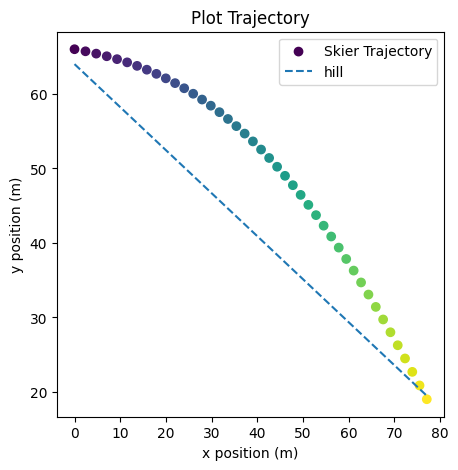

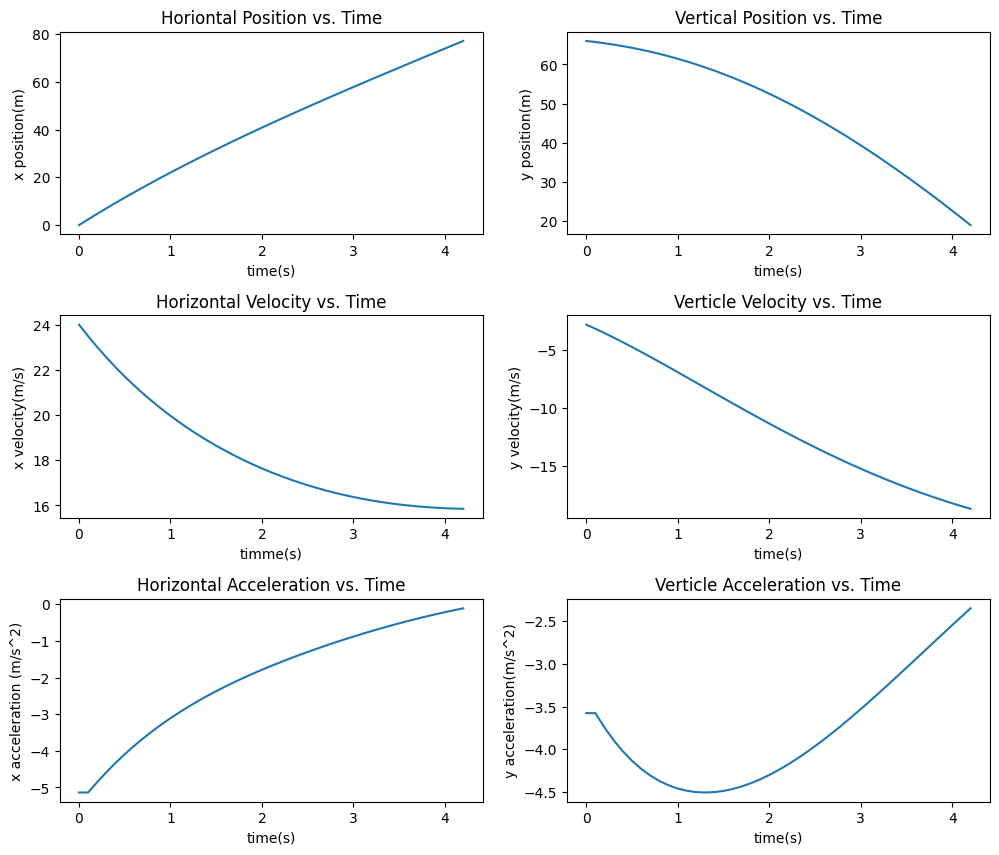

In [ ]:
##############################################
## AIR RESISTANCE PARAMETERS
##############################################

# values for the drag and lift coefficients
# DON'T CHANGE THESE
CD = 0.8 # from Gardan+2017
CL = 1.2*CD

# enter your cross-sectional dimensions for the skier
# in the flight position
height = 2 # meter, in flight position
width = 0.5 # meter
A = height * width

# set the mass of the skier
m = 60 #kg

# calculate the drag coefficients
BD = get_B2(A, C=CD)
BL = get_B2(A, C=CL)

# call main
t2,x2,y2,vx2,xy2,ax2,ay2 = main(A, BD, BL, m, dt=.1, vperp=2., plotflag=True)



# 3 - Complete Part 3.1 or 3.2

## 3.1 - Angle between the skis

(10 points)

* Historically, ski jumpers kept their skis parallel beneath their bodies.  
* More recently, jumpers create a V with their skis, and this increases the length of their jumps by increasing the area over which lift can act.
* Assume the skis are elevated about 20 degrees above the horizontal.
* Then estimate the cross-sectional area of the skier when the angle between the skis is: `[0, 15, 30, 45]` degrees.
* Create a `for` loop, and calculate the trajectory of the skier for each angle to determine the optimum angle between the skis.
* Create one graph that shows all of the trajectories on one plot.  You can do this by setting `plotflag=False` when calling `main`, and then create the plot in the cell below.  You can plot the trajectory in each pass of the for loop using the `xarr` and `yarr` returned from `main`.


The range for 10 degrees is 68.75m
The range for 20 degrees is 77.06m
The range for 30 degrees is 81.83m
The range for 40 degrees is 83.16m


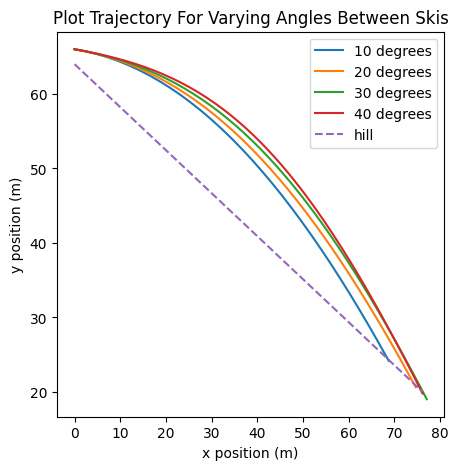

In [ ]:
##############################################
## AIR RESISTANCE PARAMETERS
##############################################

# values for the drag and lift coefficients
# DON'T CHANGE THESE
CD = 0.8 # from Gardan+2017
CL = 1.2*CD

# enter your cross-sectional dimensions for the skier
# in the flight position
height = 2 # meter, in flight position
width = 0.5 # meter
skilength = 2
angles = [10,20,30,40]
half_angles = [5,10,15,20]
plt.figure(figsize=(5,5))
for i in range(len(half_angles)):
  halfx = 2*np.sin(np.radians(half_angles[i]))
  x = 2*halfx
  h = 2*np.cos(np.radians(half_angles[i]))
  halfA = (1/2)*h*halfx
  A = 2*halfA
  m = 60
  BD = get_B2(A, C=CD)
  BL = get_B2(A, C=CL)
  t2,x2,y2,vx2,xy2,ax2,ay2 = main(A, BD, BL, m, dt=.1, vperp=2., plotflag=False)
  plt.plot(x2,y2,label=f'{2*half_angles[i]} degrees')
  print(f'The range for {2*half_angles[i]} degrees is {(x2[i])+x2[-1]:.2f}m')
h = get_hill_height(x2)
plt.plot(x2,h,'--',label='hill')
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('Plot Trajectory For Varying Angles Between Skis')
plt.legend()




## 3.2 - Angle of the Skis Above the Horizontal

(10 points)

* The angle of the skis relative to the horizontal, `alpha`, will affect the ratio of lift to drag.
* A few papers (e.g. Gardan+2017, Journal of Biomechanics) estimate the lift to drag ratio use either wind tunnels or numerical simulations.  
* We will use these estimates to see how the angle `alpha` affects the skier's trajectory.
* Using the values listed below, you can create a loop to calculate the trajectory for each combination of drag and lift parameters.
* You can update the drag and lift coefficients as follows:
```
BD = get_B2(A,C=CD[i])
BL = get_B2(A,C=CL[i])
```
* Create one graph that shows all of the trajectories on one plot.  You can do this by setting `plotflag=False` when calling `main`, and then create the plot in the cell below.  You can plot the trajectory in each pass of the for loop using the `xarr` and `yarr` returned from `main`.
* Determine which value of `alpha` produces the longest jump.


In [ ]:
alphas = np.array([14, 21.5, 29, 36.5])
CD = np.array([.7, .7, .8, 1])
CL = np.array([.6, .8, 1, 1.3])

In [ ]:
# your code here


# 5 - Bonus: Animate Your Best Jump

(5 points)


Create an animation to show the skier's position during the jump phase as a function of time.

# Submitting Your Results

* You will submit this notebook.
* You will present your results in your wiki, and you will have a separate assignment for submitting the wiki link.